In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

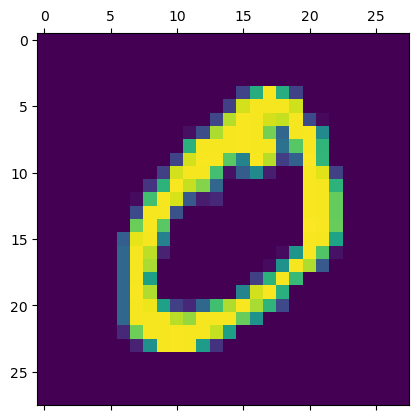

In [4]:
plt.matshow(x_train[1])

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])

In [9]:
history=model.fit(x_train,
y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6435 - accuracy: 0.8364 - val_loss: 0.3553 - val_accuracy: 0.9021
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3340 - accuracy: 0.9079 - val_loss: 0.2886 - val_accuracy: 0.9213
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2854 - accuracy: 0.9199 - val_loss: 0.2622 - val_accuracy: 0.9292
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2557 - accuracy: 0.9284 - val_loss: 0.2354 - val_accuracy: 0.9346
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2332 - accuracy: 0.9349 - val_loss: 0.2174 - val_accuracy: 0.9374
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2152 - accuracy: 0.9394 - val_loss: 0.2016 - val_accuracy: 0.9430
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1999 - accuracy: 0.9442 - val_loss: 0.1886 - val_accuracy:

In [13]:
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1601 - accuracy: 0.9535


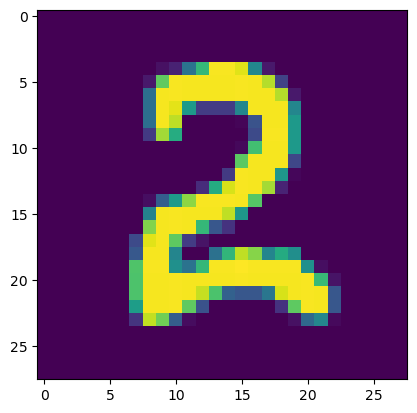

In [14]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [15]:
predicted_value=model.predict(x_test)
print("predicted class = %d " %np.argmax(predicted_value[n]))


313/313 [==============================] - 1s 3ms/step
predicted class = 2 


In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

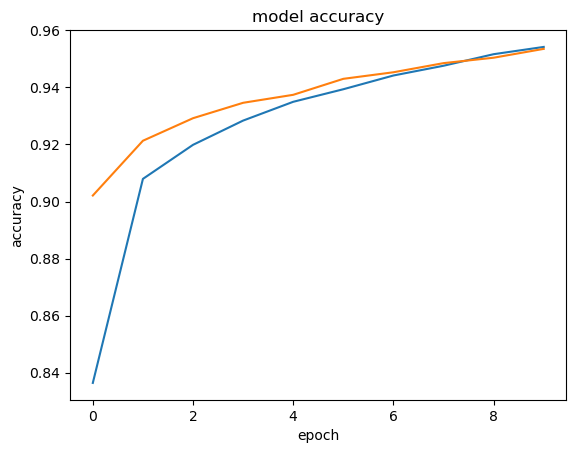

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

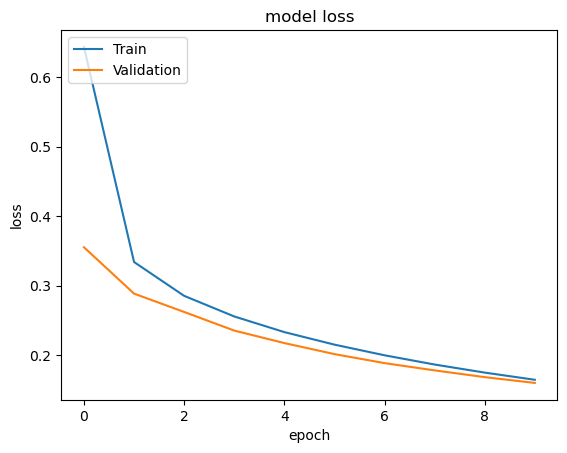

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()